In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from epoch_weekly import epoch_week_creator as ewc
import copy
import requests
import json


In [10]:
before_and_after_dict=ewc(1514764801)
teen_mom_og=['Farrah', 'Amber', 'Catelynn', 'Maci']
teen_mom_2=['Briana', 'Jenelle','Chelsea','Leah','Kailyn']

subreddit='&subreddit='
after='&after='
before='&before='
limit='&limit=1000'
teen_mom_stats={}
subreddit_name='TeenMomOGandTeenMom2'
deep_copy_before_and_after=copy.deepcopy(before_and_after_dict)
# https://api.pushshift.io/reddit/submission/search/?title=Farrah&subreddit=teenmom
for name in teen_mom_og:
    teen_mom_list=[]
    for k, v in deep_copy_before_and_after.items():
        new_list=[(k,v)]
        new_before_after=new_list[0][1]
        for before_after in new_before_after:
            print(before_after[0], before_after[1])
            base_url='https://api.pushshift.io/reddit/submission/search/?title='
            api_call=requests.get(base_url + name + subreddit + subreddit_name + after + str(before_after[0]) + before + str(before_after[1]) + limit)
            print(api_call)
            teen_mom_text=json.loads(api_call.text)
            x=len(teen_mom_text['data'])
            teen_mom_list.append(x)
        teen_mom_stats[name]=teen_mom_list
        # print(teen_mom_list)
    # print(teen_mom_stats)
df=pd.DataFrame(teen_mom_stats)

1514764801 1515369599
<Response [200]>
1515369600 1515974398
<Response [200]>
1515974399 1516579197
<Response [200]>
1516579198 1517183996
<Response [200]>
1517183997 1517788795
<Response [200]>
1517788796 1518393594
<Response [200]>
1518393595 1518998393
<Response [200]>
1518998394 1519603192
<Response [200]>
1519603193 1520207991
<Response [200]>
1520207992 1520812790
<Response [200]>
1520812791 1521417589
<Response [200]>
1521417590 1522022388
<Response [200]>
1522022389 1522627187
<Response [200]>
1522627188 1523231986
<Response [200]>
1523231987 1523836785
<Response [200]>
1523836786 1524441584
<Response [200]>
1524441585 1525046383
<Response [200]>
1525046384 1525651182
<Response [200]>
1525651183 1526255981
<Response [200]>
1526255982 1526860780
<Response [200]>
1526860781 1527465579
<Response [200]>
1527465580 1528070378
<Response [200]>
1528070379 1528675177
<Response [200]>
1528675178 1529279976
<Response [200]>
1529279977 1529884775
<Response [200]>
1529884776 1530489574
<Re

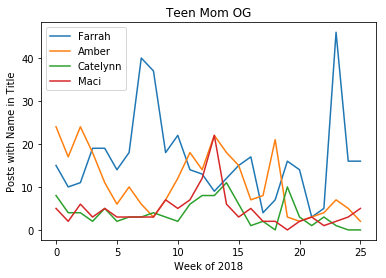

In [13]:
ax=df.plot()
ax.set_xlabel('Week of 2018')
ax.set_ylabel('Posts with Name in Title')
ax.locator_params(integer=True)
plt.title('Teen Mom OG')
plt.show()